In [13]:
import pandas as pd

In [14]:

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('exercises.db')

# Read all data from the database (you might want to specify a table name)
# This assumes there's a table you want to read - replace 'table_name' with your actual table name
df = pd.read_sql_query("SELECT * FROM exercise", conn)

# Don't forget to close the connection
conn.close()

In [15]:
df

,id,initial_fen,moves,starting_color,motives,created_at
0,1,8/p1p3p1/1p5p/6bk/1NKR4/1P6/P7/8 b - - 0 1,"[""c7c5"", ""d4d7"", ""c5b4""]",black,Fork,2025-01-26 16:35:06.174573
1,2,r2q1rk1/pp2bppp/5n2/2pp2B1/2n5/2PQ3P/PPB2PP1/1...,"[""g5f6"", ""e7f6"", ""d3h7""]",white,Undermining,2025-01-26 16:40:27.665653
2,3,2r3k1/3q1ppp/p7/1p1b4/1P6/P5BP/4NPP1/3R1RK1 w ...,"[""e2f4"", ""d7c6"", ""f4d5""]",white,Pin,2025-01-26 16:43:14.908035
3,4,r1bqkbnr/pppp1ppp/2n5/4p3/2B1N3/5N2/PPPP1PPP/R...,"[""d7d5""]",black,Fork,2025-01-26 17:54:12.337620
4,6,8/6pk/p2R3p/1b4n1/8/8/P4R2/2K5 b - - 0 1,"[""g5e4""]",black,Fork,2025-01-26 18:01:00.836833
...,...,...,...,...,...,...
100,102,r4rk1/ppp2ppp/1q1b1n2/8/8/1B4NP/PPPQ1PP1/R3R1K...,"[""d6g3""]",black,,2025-03-01 01:16:46.794926
101,103,rn1qkbnr/pp2pp1p/3p2p1/2pP1b2/2P1N3/8/PPQ2PPP/...,"[""e4f6""]",white,,2025-03-01 01:17:28.094615
102,104,2kr1N1Q/ppp1n3/3p2pn/8/2B2q2/N4P1b/PPP3PP/4RK1...,"[""f4f3"", ""f1g1"", ""f3g2""]",black,,2025-03-01 01:19:18.596489
103,105,3qnrk1/1p3ppp/8/p4N2/8/P5QP/1P3PP1/4R1K1 w - -...,"[""e1e8"", ""d8e8"", ""g3g7""]",white,Undermining,2025-03-05 16:34:07.986649


In [16]:
df['motives'].value_counts()

motives
Fork           35
Undermining    35
               27
Pin             8
Name: count, dtype: int64

In [17]:
df.loc[df['motives'] == '', 'motives'] = 'Pin'

In [18]:
df['motives'].value_counts()

motives
Fork           35
Undermining    35
Pin            35
Name: count, dtype: int64

In [21]:
df.to_csv('exercises.csv', index=False)

In [36]:
df = pd.read_csv('exercises.csv')

In [41]:
motives = df['motives'].unique()

# Create an empty dataframe to store the selected exercises
selected_exercises = pd.DataFrame()

# For each motive, select 7 random exercises
for motive in motives:
    motive_exercises = df[df['motives'] == motive]

    # If there are less than 7 exercises for a motive, take all of them
    if len(motive_exercises) <= 7:
        selected = motive_exercises
    else:
        # Select 7 random exercises
        selected = motive_exercises.sample(n=7, random_state=42)

    # Add to the selected exercises dataframe
    selected_exercises = pd.concat([selected_exercises, selected])

In [42]:
selected_exercises

,id,initial_fen,moves,starting_color,motives,created_at
40,42,2r1r1k1/ppp1bppp/8/n4b2/2qP1B2/P3RN2/5PPP/R1QB...,"[""e3e5"", ""c4c1"", ""f4c1"", ""f5g6"", ""e5a5""]",white,Fork,2025-02-28 01:30:26.251166
27,29,6k1/6p1/4p1n1/1p4r1/2pQP2p/5B1P/1P2KPPq/R7 w -...,"[""d4d8"", ""g8h7"", ""d8g5""]",white,Fork,2025-02-27 22:10:50.560066
38,40,6k1/prp3pp/N3npb1/8/P7/4N3/5PPP/5RK1 b - - 0 1,"[""g6d3"", ""a6c5"", ""e6c5""]",black,Fork,2025-02-28 01:24:00.926907
35,37,r3k2r/ppp3pp/2n1pq2/2b5/3pP3/8/PPP2PPP/RNBQ1RK...,"[""d1h5"", ""f6g6"", ""h5c5""]",white,Fork,2025-02-27 22:27:38.484881
29,31,rnbqkb1r/pp3ppp/8/1N1np3/8/8/PP2PPPP/RNBQKB1R ...,"[""d1d5"", ""d8d5"", ""b5c7"", ""e8d7"", ""c7d5""]",white,Fork,2025-02-27 22:13:35.120348
43,45,2k1n3/1pb2p2/p1p4p/8/2P2P1P/2N2RB1/PPP3r1/2K5 ...,"[""g2g3"", ""f3g3"", ""c7f4"", ""c1d1"", ""f4g3""]",black,Fork,2025-02-28 01:33:46.813727
33,35,5r1k/pp4pp/6p1/2q5/5N2/1P6/P1P3PP/5RRK w - - 0 1,"[""f4e6"", ""f8f1"", ""g1f1"", ""c5e7"", ""f1f8"", ""e7f8...",white,Fork,2025-02-27 22:25:41.344199
68,70,4r1k1/pp1q1ppp/8/8/3P4/1QP1R2P/5PP1/6K1 w - - 0 1,"[""b3b7""]",white,Undermining,2025-02-28 13:33:32.830074
55,57,1k6/p7/1p1prrB1/7P/4R3/2P3K1/PP3P2/8 b - - 0 1,"[""f6g6"", ""h5g6"", ""e6e4""]",black,Undermining,2025-02-28 13:11:50.325635
66,68,r1b1k1nr/1pp2qpp/pb6/8/8/BQ6/P4PpP/RN1R2K1 w k...,"[""d1e1"", ""e8d8"", ""b3f7""]",white,Undermining,2025-02-28 13:28:28.753840


In [47]:
group1_sessions = []

for i in range(5):
    session = []
    exercises = selected_exercises.to_dict(orient='records')
    for exercise in exercises:
        session.append({
            "id": exercise['id'],
            "motives": exercise['motives'],
            "session": i+1,
            "order_in_session": exercises.index(exercise)
        })

    group1_sessions.append(session)

In [48]:
grup1 = pd.DataFrame(group1_sessions)

In [49]:
grup1.to_csv('group1.csv', index=False)

In [50]:
grup1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"{'id': 42, 'motives': 'Fork', 'session': 1, 'o...","{'id': 29, 'motives': 'Fork', 'session': 1, 'o...","{'id': 40, 'motives': 'Fork', 'session': 1, 'o...","{'id': 37, 'motives': 'Fork', 'session': 1, 'o...","{'id': 31, 'motives': 'Fork', 'session': 1, 'o...","{'id': 45, 'motives': 'Fork', 'session': 1, 'o...","{'id': 35, 'motives': 'Fork', 'session': 1, 'o...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 68, 'motives': 'Undermining', 'session'...",...,"{'id': 59, 'motives': 'Undermining', 'session'...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 63, 'motives': 'Undermining', 'session'...","{'id': 96, 'motives': 'Pin', 'session': 1, 'or...","{'id': 83, 'motives': 'Pin', 'session': 1, 'or...","{'id': 94, 'motives': 'Pin', 'session': 1, 'or...","{'id': 91, 'motives': 'Pin', 'session': 1, 'or...","{'id': 85, 'motives': 'Pin', 'session': 1, 'or...","{'id': 99, 'motives': 'Pin', 'session': 1, 'or...","{'id': 89, 'motives': 'Pin', 'session': 1, 'or..."
1,"{'id': 42, 'motives': 'Fork', 'session': 2, 'o...","{'id': 29, 'motives': 'Fork', 'session': 2, 'o...","{'id': 40, 'motives': 'Fork', 'session': 2, 'o...","{'id': 37, 'motives': 'Fork', 'session': 2, 'o...","{'id': 31, 'motives': 'Fork', 'session': 2, 'o...","{'id': 45, 'motives': 'Fork', 'session': 2, 'o...","{'id': 35, 'motives': 'Fork', 'session': 2, 'o...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 68, 'motives': 'Undermining', 'session'...",...,"{'id': 59, 'motives': 'Undermining', 'session'...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 63, 'motives': 'Undermining', 'session'...","{'id': 96, 'motives': 'Pin', 'session': 2, 'or...","{'id': 83, 'motives': 'Pin', 'session': 2, 'or...","{'id': 94, 'motives': 'Pin', 'session': 2, 'or...","{'id': 91, 'motives': 'Pin', 'session': 2, 'or...","{'id': 85, 'motives': 'Pin', 'session': 2, 'or...","{'id': 99, 'motives': 'Pin', 'session': 2, 'or...","{'id': 89, 'motives': 'Pin', 'session': 2, 'or..."
2,"{'id': 42, 'motives': 'Fork', 'session': 3, 'o...","{'id': 29, 'motives': 'Fork', 'session': 3, 'o...","{'id': 40, 'motives': 'Fork', 'session': 3, 'o...","{'id': 37, 'motives': 'Fork', 'session': 3, 'o...","{'id': 31, 'motives': 'Fork', 'session': 3, 'o...","{'id': 45, 'motives': 'Fork', 'session': 3, 'o...","{'id': 35, 'motives': 'Fork', 'session': 3, 'o...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 68, 'motives': 'Undermining', 'session'...",...,"{'id': 59, 'motives': 'Undermining', 'session'...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 63, 'motives': 'Undermining', 'session'...","{'id': 96, 'motives': 'Pin', 'session': 3, 'or...","{'id': 83, 'motives': 'Pin', 'session': 3, 'or...","{'id': 94, 'motives': 'Pin', 'session': 3, 'or...","{'id': 91, 'motives': 'Pin', 'session': 3, 'or...","{'id': 85, 'motives': 'Pin', 'session': 3, 'or...","{'id': 99, 'motives': 'Pin', 'session': 3, 'or...","{'id': 89, 'motives': 'Pin', 'session': 3, 'or..."
3,"{'id': 42, 'motives': 'Fork', 'session': 4, 'o...","{'id': 29, 'motives': 'Fork', 'session': 4, 'o...","{'id': 40, 'motives': 'Fork', 'session': 4, 'o...","{'id': 37, 'motives': 'Fork', 'session': 4, 'o...","{'id': 31, 'motives': 'Fork', 'session': 4, 'o...","{'id': 45, 'motives': 'Fork', 'session': 4, 'o...","{'id': 35, 'motives': 'Fork', 'session': 4, 'o...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 68, 'motives': 'Undermining', 'session'...",...,"{'id': 59, 'motives': 'Undermining', 'session'...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 63, 'motives': 'Undermining', 'session'...","{'id': 96, 'motives': 'Pin', 'session': 4, 'or...","{'id': 83, 'motives': 'Pin', 'session': 4, 'or...","{'id': 94, 'motives'

In [51]:
import random
def randomize_exercises_with_constraint(exercises_df):
    # Convert to list of dictionaries for easier manipulation
    exercises_list = exercises_df.to_dict(orient='records')

    # Shuffle exercises
    random.shuffle(exercises_list)

    # Ensure no consecutive puzzles have the same motif
    for i in range(1, len(exercises_list)):
        # If current exercise has same motif as previous one
        if exercises_list[i]['motives'] == exercises_list[i-1]['motives']:
            # Find an exercise with a different motif to swap with
            for j in range(i+1, len(exercises_list)):
                if exercises_list[j]['motives'] != exercises_list[i-1]['motives']:
                    # Swap exercises
                    exercises_list[i], exercises_list[j] = exercises_list[j], exercises_list[i]
                    break

    # Verify no consecutive exercises have the same motif
    for i in range(1, len(exercises_list)):
        if exercises_list[i]['motives'] == exercises_list[i-1]['motives']:
            # If we still have consecutive same motifs, try again with a different random seed
            return randomize_exercises_with_constraint(exercises_df)

    return exercises_list

In [52]:
group2_sessions = []
for i in range(5):
    session = []
    # Create a deep copy of the exercises and randomize them
    randomized_exercises = randomize_exercises_with_constraint(selected_exercises)
    for exercise in randomized_exercises:
        session.append({
            "id": exercise['id'],
            "motives": exercise['motives'],
            "session": i+1,
            "order_in_session": randomized_exercises.index(exercise)
        })
    # Create session data

    group2_sessions.append(session)

In [53]:
grup2 = pd.DataFrame(group2_sessions)
grup2.to_csv('group2.csv', index=False)
grup2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"{'id': 63, 'motives': 'Undermining', 'session'...","{'id': 83, 'motives': 'Pin', 'session': 1, 'or...","{'id': 42, 'motives': 'Fork', 'session': 1, 'o...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 96, 'motives': 'Pin', 'session': 1, 'or...","{'id': 29, 'motives': 'Fork', 'session': 1, 'o...","{'id': 91, 'motives': 'Pin', 'session': 1, 'or...","{'id': 35, 'motives': 'Fork', 'session': 1, 'o...","{'id': 89, 'motives': 'Pin', 'session': 1, 'or...","{'id': 45, 'motives': 'Fork', 'session': 1, 'o...",...,"{'id': 40, 'motives': 'Fork', 'session': 1, 'o...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 37, 'motives': 'Fork', 'session': 1, 'o...","{'id': 65, 'motives': 'Undermining', 'session'...","{'id': 94, 'motives': 'Pin', 'session': 1, 'or...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 31, 'motives': 'Fork', 'session': 1, 'o...","{'id': 68, 'motives': 'Undermining', 'session'...","{'id': 85, 'motives': 'Pin', 'session': 1, 'or...","{'id': 59, 'motives': 'Undermining', 'session'..."
1,"{'id': 94, 'motives': 'Pin', 'session': 2, 'or...","{'id': 31, 'motives': 'Fork', 'session': 2, 'o...","{'id': 96, 'motives': 'Pin', 'session': 2, 'or...","{'id': 37, 'motives': 'Fork', 'session': 2, 'o...","{'id': 89, 'motives': 'Pin', 'session': 2, 'or...","{'id': 40, 'motives': 'Fork', 'session': 2, 'o...","{'id': 85, 'motives': 'Pin', 'session': 2, 'or...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 83, 'motives': 'Pin', 'session': 2, 'or...","{'id': 65, 'motives': 'Undermining', 'session'...",...,"{'id': 59, 'motives': 'Undermining', 'session'...","{'id': 91, 'motives': 'Pin', 'session': 2, 'or...","{'id': 42, 'motives': 'Fork', 'session': 2, 'o...","{'id': 68, 'motives': 'Undermining', 'session'...","{'id': 29, 'motives': 'Fork', 'session': 2, 'o...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 45, 'motives': 'Fork', 'session': 2, 'o...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 35, 'motives': 'Fork', 'session': 2, 'o...","{'id': 63, 'motives': 'Undermining', 'session'..."
2,"{'id': 45, 'motives': 'Fork', 'session': 3, 'o...","{'id': 83, 'motives': 'Pin', 'session': 3, 'or...","{'id': 31, 'motives': 'Fork', 'session': 3, 'o...","{'id': 59, 'motives': 'Undermining', 'session'...","{'id': 94, 'motives': 'Pin', 'session': 3, 'or...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 85, 'motives': 'Pin', 'session': 3, 'or...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 91, 'motives': 'Pin', 'session': 3, 'or...","{'id': 63, 'motives': 'Undermining', 'session'...",...,"{'id': 89, 'motives': 'Pin', 'session': 3, 'or...","{'id': 37, 'motives': 'Fork', 'session': 3, 'o...","{'id': 68, 'motives': 'Undermining', 'session'...","{'id': 29, 'motives': 'Fork', 'session': 3, 'o...","{'id': 65, 'motives': 'Undermining', 'session'...","{'id': 42, 'motives': 'Fork', 'session': 3, 'o...","{'id': 96, 'motives': 'Pin', 'session': 3, 'or...","{'id': 35, 'motives': 'Fork', 'session': 3, 'o...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 99, 'motives': 'Pin', 'session': 3, 'or..."
3,"{'id': 68, 'motives': 'Undermining', 'session'...","{'id': 45, 'motives': 'Fork', 'session': 4, 'o...","{'id': 94, 'motives': 'Pin', 'session': 4, 'or...","{'id': 40, 'motives': 'Fork', 'session': 4, 'o...","{'id': 99, 'motives': 'Pin', 'session': 4, 'or...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 91, 'motives': 'Pin', 'session': 4, 'or...","{'id': 29, 'motives': 'Fork', 'session': 4, 'o...","{'id': 89, 'motives': 'Pin', 'session': 4, 'or...","{'id': 57, 'motives': 'Undermining', 'session'...",...,"{'id': 63, 'motives': 'Undermining', 'session'...","{'id': 83, 'motives': 'Pin', 'session': 4, 'or...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 31, 'motives': 'Fork', 'session': 4, 'o...","{'id': 65, 'motives': 'Undermining', 'session'...","{'id': 42, 'motives'

In [81]:
ids = []
for session in group2_sessions:
    for exercise in session:
        ids.append(exercise.get('id'))
    print(len(ids))
    print(len(set(ids)))

ids = set(ids)

21
21
42
21
63
21
84
21
105
21


In [82]:
grup3_sessions = [group1_sessions[0]]
grup4_sessions = [group2_sessions[0]]

In [73]:
# Drop rows where the 'id' column value is in the 'ids' list
df = df[~df['id'].isin(ids)]

In [74]:
df

,id,initial_fen,moves,starting_color,motives,created_at
0,1,8/p1p3p1/1p5p/6bk/1NKR4/1P6/P7/8 b - - 0 1,"[""c7c5"", ""d4d7"", ""c5b4""]",black,Fork,2025-01-26 16:35:06.174573
1,2,r2q1rk1/pp2bppp/5n2/2pp2B1/2n5/2PQ3P/PPB2PP1/1...,"[""g5f6"", ""e7f6"", ""d3h7""]",white,Undermining,2025-01-26 16:40:27.665653
2,3,2r3k1/3q1ppp/p7/1p1b4/1P6/P5BP/4NPP1/3R1RK1 w ...,"[""e2f4"", ""d7c6"", ""f4d5""]",white,Pin,2025-01-26 16:43:14.908035
3,4,r1bqkbnr/pppp1ppp/2n5/4p3/2B1N3/5N2/PPPP1PPP/R...,"[""d7d5""]",black,Fork,2025-01-26 17:54:12.337620
4,6,8/6pk/p2R3p/1b4n1/8/8/P4R2/2K5 b - - 0 1,"[""g5e4""]",black,Fork,2025-01-26 18:01:00.836833
...,...,...,...,...,...,...
100,102,r4rk1/ppp2ppp/1q1b1n2/8/8/1B4NP/PPPQ1PP1/R3R1K...,"[""d6g3""]",black,Pin,2025-03-01 01:16:46.794926
101,103,rn1qkbnr/pp2pp1p/3p2p1/2pP1b2/2P1N3/8/PPQ2PPP/...,"[""e4f6""]",white,Pin,2025-03-01 01:17:28.094615
102,104,2kr1N1Q/ppp1n3/3p2pn/8/2B2q2/N4P1b/PPP3PP/4RK1...,"[""f4f3"", ""f1g1"", ""f3g2""]",black,Pin,2025-03-01 01:19:18.596489
103,105,3qnrk1/1p3ppp/8/p4N2/8/P5QP/1P3PP1/4R1K1 w - -...,"[""e1e8"", ""d8e8"", ""g3g7""]",white,Undermining,2025-03-05 16:34:07.986649


In [76]:
def select_exercises(df):
    motives = df['motives'].unique()
    # Create an empty dataframe to store the selected exercises
    selected_exercises = pd.DataFrame()

    # Create a copy of the original dataframe to modify
    remaining_df = df.copy()

    # For each motive, select 7 random exercises
    for motive in motives:
        motive_exercises = remaining_df[remaining_df['motives'] == motive]

        # If there are less than 7 exercises for a motive, take all of them
        if len(motive_exercises) <= 7:
            selected = motive_exercises
        else:
            # Select 7 random exercises
            selected = motive_exercises.sample(n=7, random_state=42)

        # Add to the selected exercises dataframe
        selected_exercises = pd.concat([selected_exercises, selected])

        # Remove the selected exercises from the remaining dataframe
        remaining_df = remaining_df.drop(selected.index)

    # Return both the selected exercises and the modified dataframe
    return selected_exercises, remaining_df

In [77]:
for i in range(4):
    selected_exercises, df = select_exercises(df)
    session = []
    exercises = selected_exercises.to_dict(orient='records')
    for exercise in exercises:
        session.append({
            "id": exercise['id'],
            "motives": exercise['motives'],
            "session": i+2,
            "order_in_session": exercises.index(exercise)
        })
    grup3_sessions.append(session)
    session = []

    randomized_exercises = randomize_exercises_with_constraint(selected_exercises)
    for exercise in randomized_exercises:
        session.append({
            "id": exercise['id'],
            "motives": exercise['motives'],
            "session": i+2,
            "order_in_session": randomized_exercises.index(exercise)
        })
    grup4_sessions.append(session)


In [80]:
grup3_sessions

[0    {'id': 42, 'motives': 'Fork', 'session': 1, 'o...
 1    {'id': 42, 'motives': 'Fork', 'session': 2, 'o...
 2    {'id': 42, 'motives': 'Fork', 'session': 3, 'o...
 3    {'id': 42, 'motives': 'Fork', 'session': 4, 'o...
 4    {'id': 42, 'motives': 'Fork', 'session': 5, 'o...
 Name: 0, dtype: object,
 [{'id': 25, 'motives': 'Fork', 'session': 2, 'order_in_session': 0},
  {'id': 48, 'motives': 'Fork', 'session': 2, 'order_in_session': 1},
  {'id': 24, 'motives': 'Fork', 'session': 2, 'order_in_session': 2},
  {'id': 43, 'motives': 'Fork', 'session': 2, 'order_in_session': 3},
  {'id': 1, 'motives': 'Fork', 'session': 2, 'order_in_session': 4},
  {'id': 28, 'motives': 'Fork', 'session': 2, 'order_in_session': 5},
  {'id': 36, 'motives': 'Fork', 'session': 2, 'order_in_session': 6},
  {'id': 53, 'motives': 'Undermining', 'session': 2, 'order_in_session': 7},
  {'id': 76, 'motives': 'Undermining', 'session': 2, 'order_in_session': 8},
  {'id': 52, 'motives': 'Undermining', 'session': 2,

In [83]:
grup3 = pd.DataFrame(grup3_sessions)
grup4 = pd.DataFrame(grup4_sessions)
grup3.to_csv('grup3.csv', index=False)
grup4.to_csv('grup4.csv', index=False)

In [84]:
grup3


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"{'id': 42, 'motives': 'Fork', 'session': 1, 'o...","{'id': 29, 'motives': 'Fork', 'session': 1, 'o...","{'id': 40, 'motives': 'Fork', 'session': 1, 'o...","{'id': 37, 'motives': 'Fork', 'session': 1, 'o...","{'id': 31, 'motives': 'Fork', 'session': 1, 'o...","{'id': 45, 'motives': 'Fork', 'session': 1, 'o...","{'id': 35, 'motives': 'Fork', 'session': 1, 'o...","{'id': 70, 'motives': 'Undermining', 'session'...","{'id': 57, 'motives': 'Undermining', 'session'...","{'id': 68, 'motives': 'Undermining', 'session'...",...,"{'id': 59, 'motives': 'Undermining', 'session'...","{'id': 73, 'motives': 'Undermining', 'session'...","{'id': 63, 'motives': 'Undermining', 'session'...","{'id': 96, 'motives': 'Pin', 'session': 1, 'or...","{'id': 83, 'motives': 'Pin', 'session': 1, 'or...","{'id': 94, 'motives': 'Pin', 'session': 1, 'or...","{'id': 91, 'motives': 'Pin', 'session': 1, 'or...","{'id': 85, 'motives': 'Pin', 'session': 1, 'or...","{'id': 99, 'motives': 'Pin', 'session': 1, 'or...","{'id': 89, 'motives': 'Pin', 'session': 1, 'or..."
1,"{'id': 25, 'motives': 'Fork', 'session': 2, 'o...","{'id': 48, 'motives': 'Fork', 'session': 2, 'o...","{'id': 24, 'motives': 'Fork', 'session': 2, 'o...","{'id': 43, 'motives': 'Fork', 'session': 2, 'o...","{'id': 1, 'motives': 'Fork', 'session': 2, 'or...","{'id': 28, 'motives': 'Fork', 'session': 2, 'o...","{'id': 36, 'motives': 'Fork', 'session': 2, 'o...","{'id': 53, 'motives': 'Undermining', 'session'...","{'id': 76, 'motives': 'Undermining', 'session'...","{'id': 52, 'motives': 'Undermining', 'session'...",...,"{'id': 2, 'motives': 'Undermining', 'session':...","{'id': 56, 'motives': 'Undermining', 'session'...","{'id': 64, 'motives': 'Undermining', 'session'...","{'id': 79, 'motives': 'Pin', 'session': 2, 'or...","{'id': 102, 'motives': 'Pin', 'session': 2, 'o...","{'id': 78, 'motives': 'Pin', 'session': 2, 'or...","{'id': 97, 'motives': 'Pin', 'session': 2, 'or...","{'id': 3, 'motives': 'Pin', 'session': 2, 'ord...","{'id': 82, 'motives': 'Pin', 'session': 2, 'or...","{'id': 90, 'motives': 'Pin', 'session': 2, 'or..."
2,"{'id': 4, 'motives': 'Fork', 'session': 3, 'or...","{'id': 46, 'motives': 'Fork', 'session': 3, 'o...","{'id': 41, 'motives': 'Fork', 'session': 3, 'o...","{'id': 6, 'motives': 'Fork', 'session': 3, 'or...","{'id': 27, 'motives': 'Fork', 'session': 3, 'o...","{'id': 10, 'motives': 'Fork', 'session': 3, 'o...","{'id': 33, 'motives': 'Fork', 'session': 3, 'o...","{'id': 11, 'motives': 'Pin', 'session': 3, 'or...","{'id': 100, 'motives': 'Pin', 'session': 3, 'o...","{'id': 95, 'motives': 'Pin', 'session': 3, 'or...",...,"{'id': 81, 'motives': 'Pin', 'session': 3, 'or...","{'id': 16, 'motives': 'Pin', 'session': 3, 'or...","{'id': 87, 'motives': 'Pin', 'session': 3, 'or...","{'id': 17, 'motives': 'Undermining', 'session'...","{'id': 74, 'motives': 'Undermining', 'session'...","{'id': 69, 'motives': 'Undermining', 'session'...","{'id': 18, 'motives': 'Undermining', 'session'...","{'id': 55, 'motives': 'Undermining', 'session'...","{'id': 22, 'motives': 'Undermining', 'session'...","{'id': 61, 'motives': 'Undermining', 'session'..."
3,"{'id': 39, 'motives': 'Fork', 'session': 4, 'o...","{'id': 47, 'motives': 'Fork', 'session': 4, 'o...","{'id': 7, 'motives': 'Fork', 'session': 4, 'or...","{'id': 49, 'motives': 'Fork', 'session': 4, 'o...","{'id': 30, 'motives': 'Fork', 'session': 4, 'o...","{'id': 38, 'motives': 'Fork', 'session': 4, 'o...","{'id': 9, 'motives': 'Fork', 'session': 4, 'or...","{'id': 93, 'motives': 'Pin', 'session': 4, 'or...","{'id': 101, 'motives': 'Pin', 'session': 4, 'o...","{'id': 13, 'motives': 'Pin', 'session': 4, 'or...",...,"{'id': 84, 'motives': 'Pin', 'session': 4, 'or...","{'id': 92, 'motives': 'Pin', 'session': 4, 'or...","{'id': 15, 'motives': 'Pin', 'session': 4, 'or...","{'id': 67, 'motives': 'Undermining', 'session'...","{'id': 75, 'motives': 'Undermining', 'session'...","{'id': 19, 'motives'

Group 1 has 105 exercises across 5 sessions
Group 2 has 105 exercises across 5 sessions
Group 3 has 105 exercises across 5 sessions
Group 4 has 105 exercises across 5 sessions


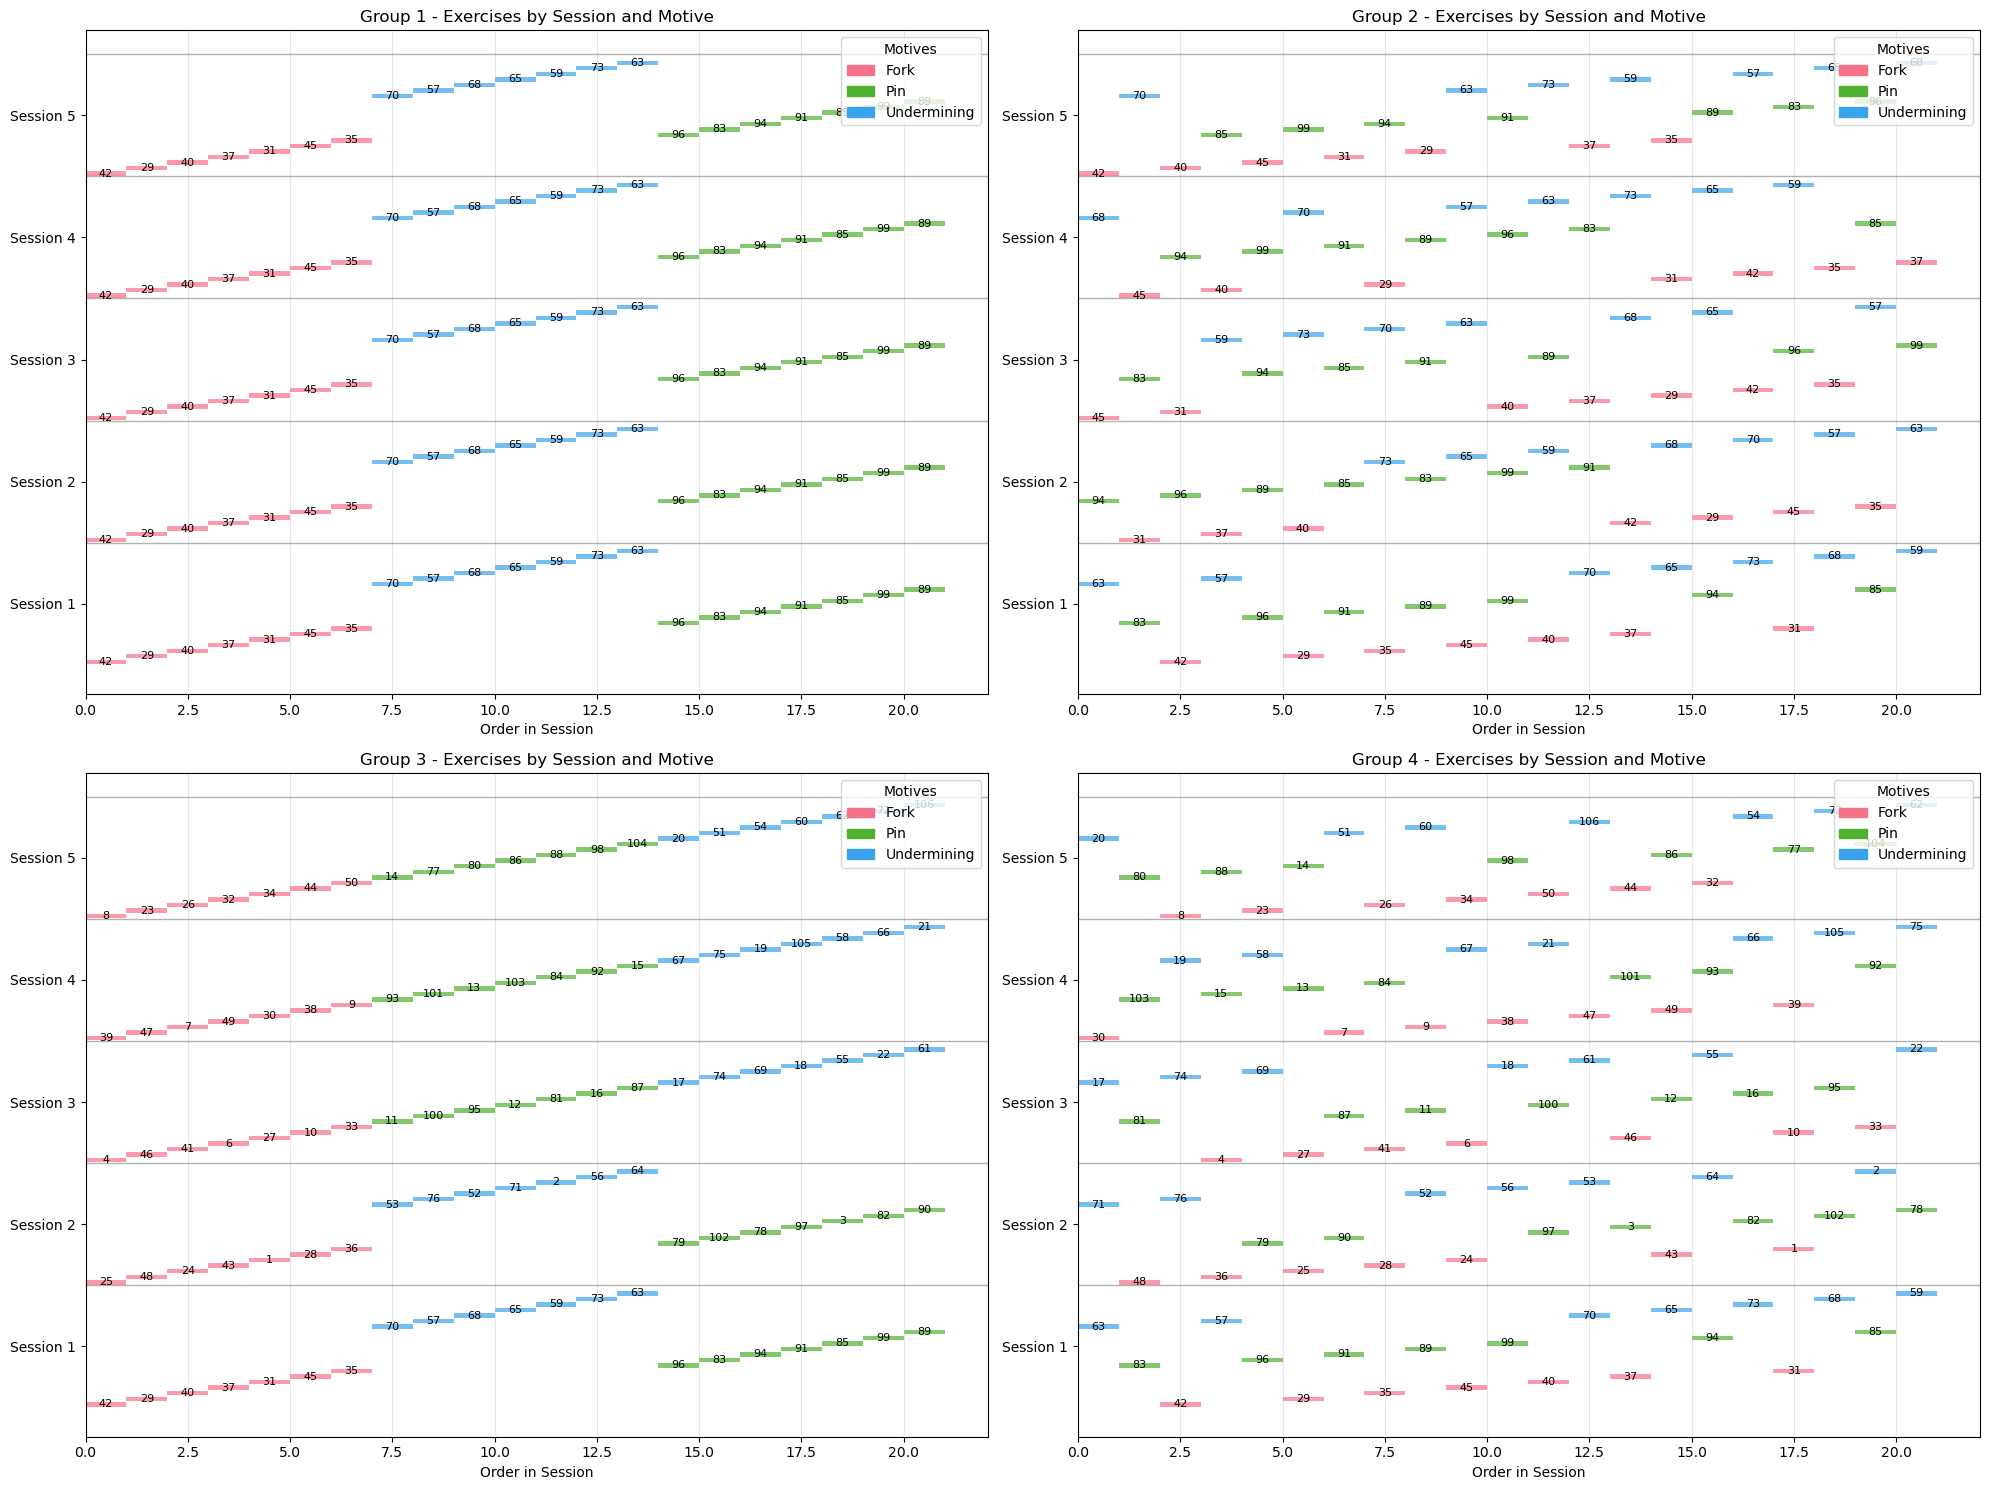

/var/folders/pg/scy9phjd21g26ks7jb9724zw0000gn/T/ipykernel_41635/289883262.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_pivot = pivot_data.applymap(lambda x: motive_to_num.get(x, -1) if pd.notna(x) else -1)
/var/folders/pg/scy9phjd21g26ks7jb9724zw0000gn/T/ipykernel_41635/289883262.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_pivot = pivot_data.applymap(lambda x: motive_to_num.get(x, -1) if pd.notna(x) else -1)
/var/folders/pg/scy9phjd21g26ks7jb9724zw0000gn/T/ipykernel_41635/289883262.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_pivot = pivot_data.applymap(lambda x: motive_to_num.get(x, -1) if pd.notna(x) else -1)
/var/folders/pg/scy9phjd21g26ks7jb9724zw0000gn/T/ipykernel_41635/289883262.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_pivot = pivot_data.applymap(lambda x: m

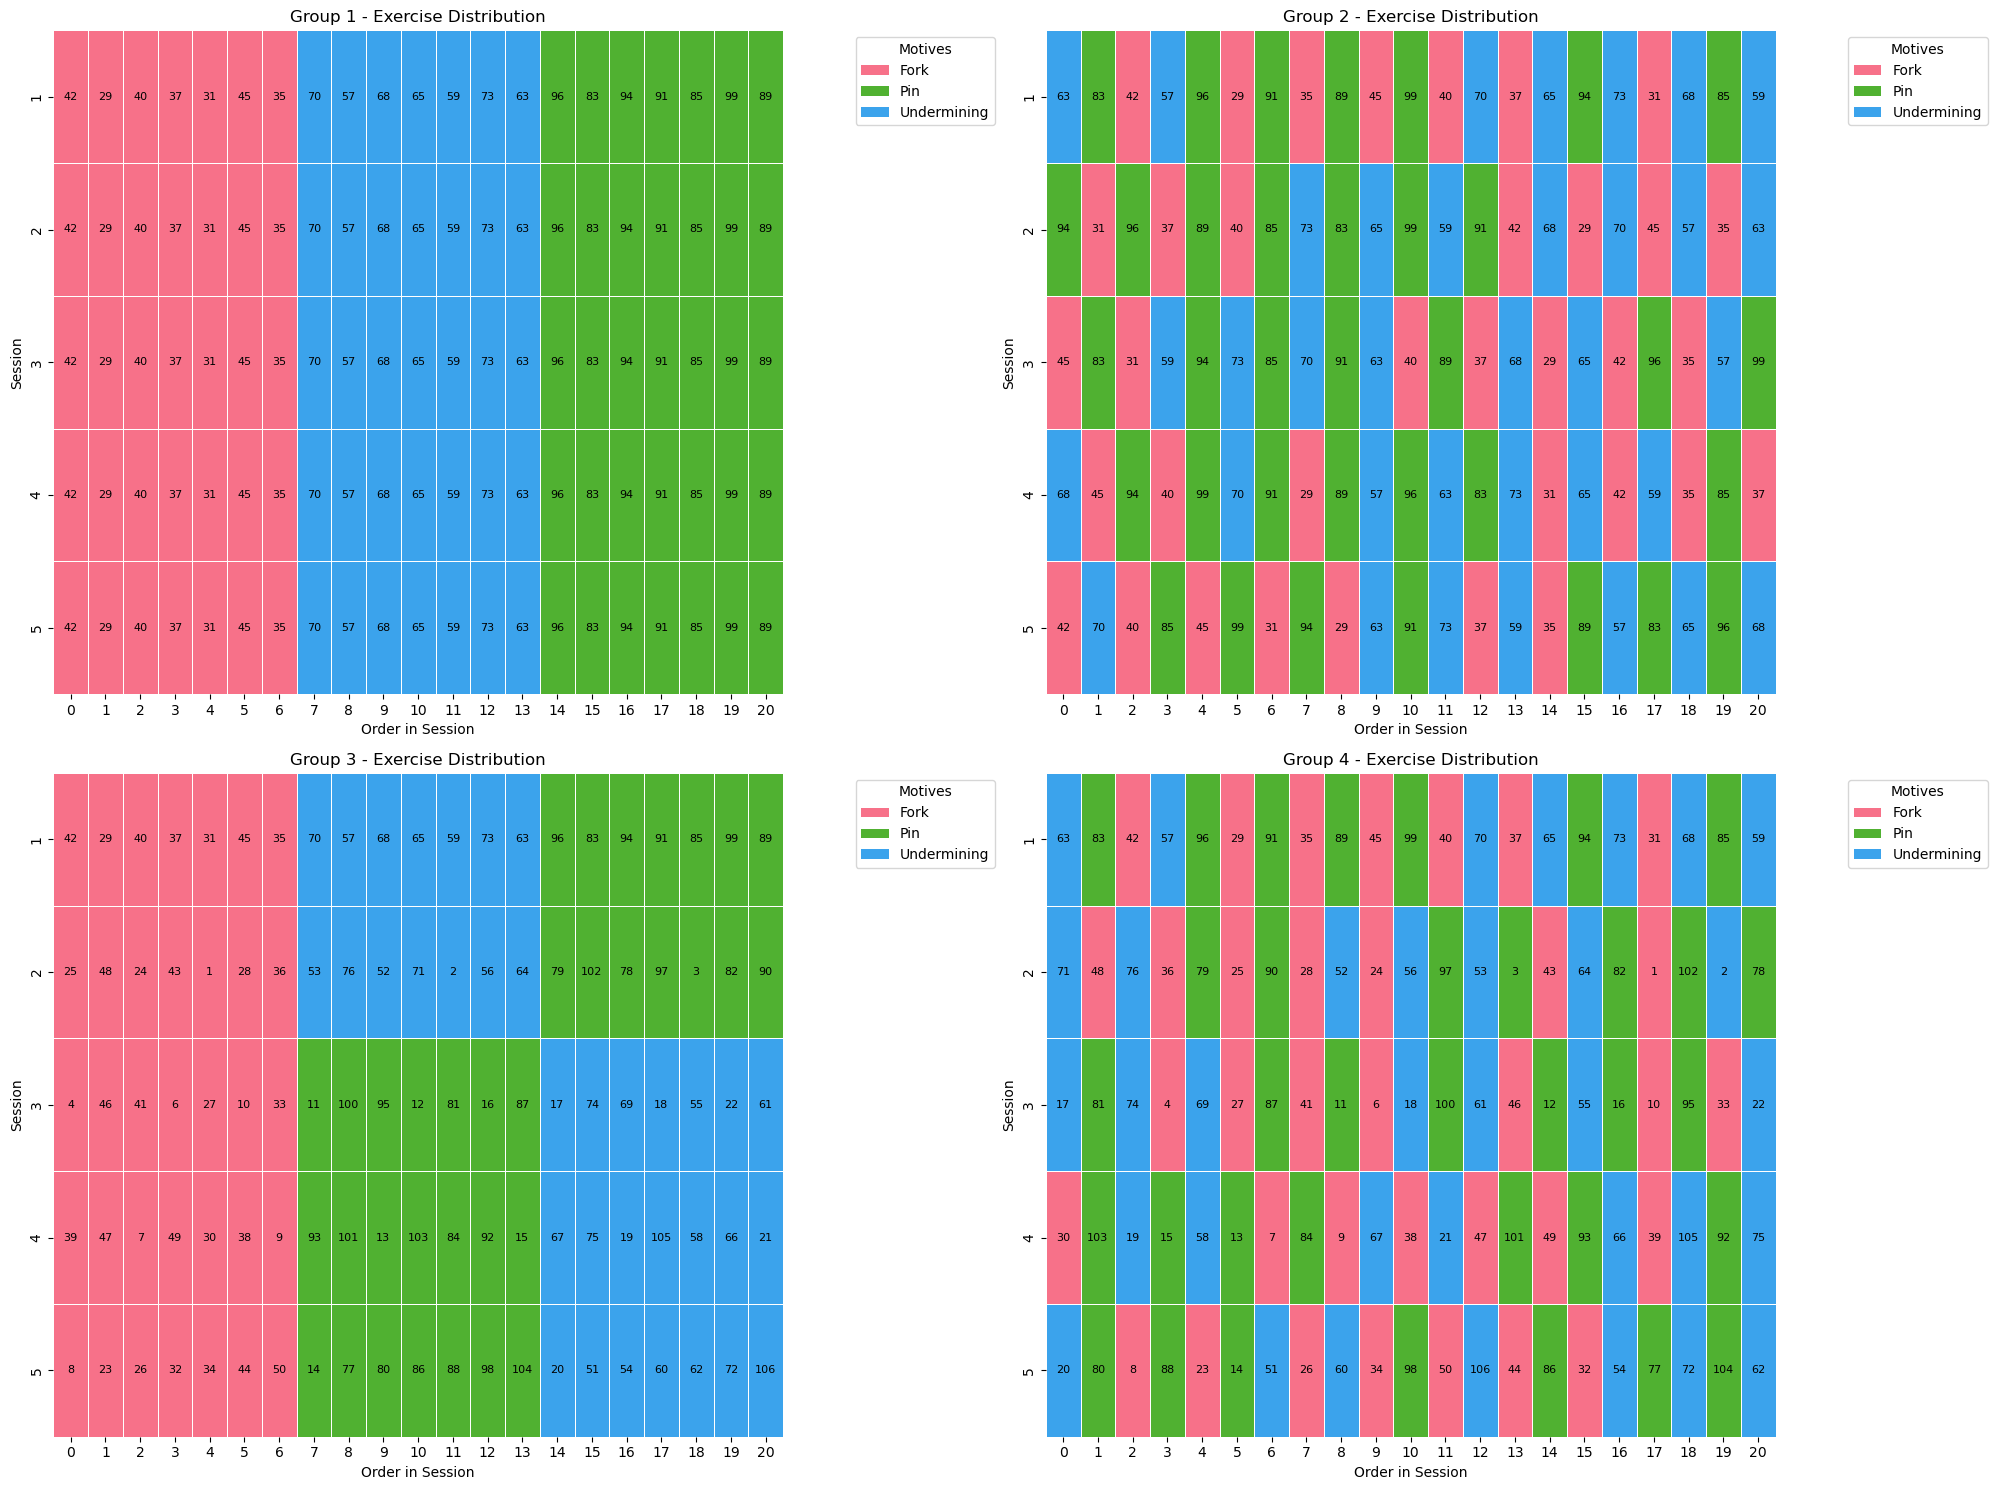